In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *
from logreg import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

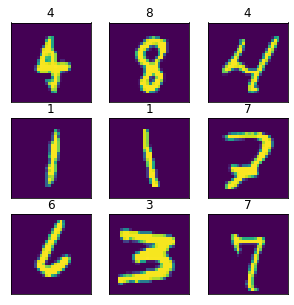

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
# Preprocess Y for our NN
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1

In [6]:
y_test_onehot.shape

(14000, 10)

In [7]:
learning_rate = np.logspace(-3, 0, 4)
tot_epochs = 40
epochs_per_itter = 1
num_itter = int(tot_epochs / epochs_per_itter)
momentum = 0

N = X_train.shape[0]
MB_num = [int(N / 32), int(N / 128)]
logreg_score = np.zeros([len(MB_num), len(learning_rate), num_itter])

np.random.seed(2020)

# Initialize the logreg using the same weights across all attempts
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1])
for k in range(len(MB_num)):
    for i in range(len(learning_rate)):    
        reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num[k],
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,)
        
        y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
        y_test_model = np.argmax(y_predict,axis=1)
        y_test_data = np.argmax(y_test_onehot,axis=1)
        score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

        logreg_score[k, i, 0] = score

        for j in range(1, num_itter):
            reg_w = logreg(
                x = X_train, 
                y = y_train_onehot, 
                M = MB_num[k],
                init_w = reg_w, 
                n_epochs = epochs_per_itter, 
                learning_rate = learning_rate[i], 
                momentum = momentum,)
            
            y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
            y_test_model = np.argmax(y_predict,axis=1)
            y_test_data = np.argmax(y_test_onehot,axis=1)
            score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

            logreg_score[k, i, j] = score

In [8]:
learning_rate = np.logspace(-3, 0, 4)
tot_epochs = 40
epochs_per_itter = 1
num_itter = int(tot_epochs / epochs_per_itter)
momentum = 0.75

N = X_train.shape[0]
MB_num = [int(N / 32), int(N / 128)]
logreg_score_momentum = np.zeros([len(MB_num), len(learning_rate), num_itter])

np.random.seed(2020)

# Initialize the logreg using the same weights across all attempts
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1])
for k in range(len(MB_num)):
    for i in range(len(learning_rate)):    
        reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num[k],
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,)
        
        y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
        y_test_model = np.argmax(y_predict,axis=1)
        y_test_data = np.argmax(y_test_onehot,axis=1)
        score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

        logreg_score_momentum[k, i, 0] = score

        for j in range(1, num_itter):
            reg_w = logreg(
                x = X_train, 
                y = y_train_onehot, 
                M = MB_num[k],
                init_w = reg_w, 
                n_epochs = epochs_per_itter, 
                learning_rate = learning_rate[i], 
                momentum = momentum,)
            
            y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
            y_test_model = np.argmax(y_predict,axis=1)
            y_test_data = np.argmax(y_test_onehot,axis=1)
            score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

            logreg_score_momentum[k, i, j] = score

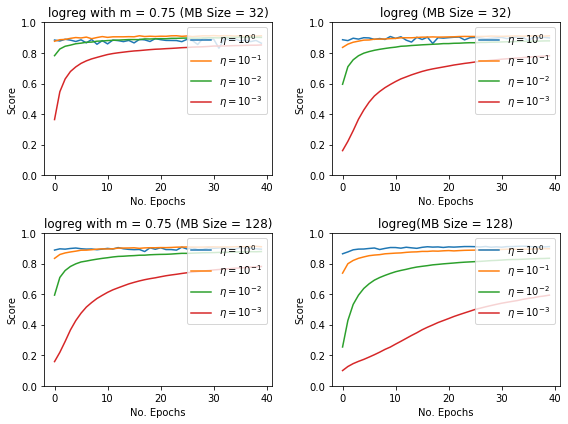

In [9]:
FIGSIZE = (4, 3)
YLIMS = [0, 1]

plt.figure(figsize=FIGSIZE * np.array([2, 2]))
plt.subplot(221)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score_momentum[0, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="upper right")
plt.title(f"logreg with m = {momentum} (MB Size = {32})")

plt.subplot(222)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score[0, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="upper right")
plt.title(f"logreg (MB Size = {32})")


plt.subplot(223)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score_momentum[1, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="upper right")
plt.title(f"logreg with m = {momentum} (MB Size = {128})")

plt.subplot(224)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score[1, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
fig_leg = plt.legend(loc="upper right")
plt.title(f"logreg(MB Size = {128})")


plt.tight_layout()

In [10]:
#Skeleton for logreg use:


# Get data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Rescale the X data from [0, 255] -> [0, 1]
X /= 255.0

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Preprocess Y for logreg
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1


In [11]:
# Do the logreg
np.random.seed(2020)
np.random.randn(X_train.shape[1], y_train_onehot.shape[1]).shape
reg_w = logreg(
    x = X_train, 
    y = y_train_onehot, 
    M = int(len(y_train_onehot)/32), 
    init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1]), 
    n_epochs = 100, 
    learning_rate = 0.01, 
    momentum = 0.75, 
    lambd=None) # Set lambd if l2-regularization is wanted

# How does it score?
y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
y_test_model = np.argmax(y_predict,axis=1)
y_test_data = np.argmax(y_test_onehot,axis=1)
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print('for 100 epochs and no lambda, score:{}'.format(score))


# Do it again with lambda:
np.random.seed(2020)
np.random.randn(X_train.shape[1], y_train_onehot.shape[1]).shape
reg_w = logreg(
    x = X_train, 
    y = y_train_onehot, 
    M = int(len(y_train_onehot)/32), 
    init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1]), 
    n_epochs = 100, 
    learning_rate = 0.01, 
    momentum = 0.75, 
    lambd=1e-4) # Set lambd if l2-regularization is wanted

# How does it score?
y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
y_test_model = np.argmax(y_predict,axis=1)
y_test_data = np.argmax(y_test_onehot,axis=1)
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print('for 100 epochs and 1e-4 lambda, score:{}'.format(score))

for 100 epochs and no lambda, score:0.9147142857142857
for 100 epochs and 1e-4 lambda, score:0.9149285714285714


In [14]:
SKL_logreg = LogisticRegression()
SKL_logreg.fit(X_train,y_train)
print('Scikit default logistic regression score:{}'.format(SKL_logreg.score(X_train,y_train)))

Scikit default logistic regression score:0.9358035714285714


/Users/thoreem/opt/anaconda3/envs/mlhome/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
